In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: C:\Users\bough\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [6]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Charger le dataset nettoyé NLP
df = pd.read_csv("data_nlp_ready.csv")

# Vérifier la colonne full_text
print("Exemple texte :", df['full_text'].head(3).tolist())


Exemple texte : ['patient an douleurs lhypochondre droit fievre sagit dun patient an connu hypertension artacrielle traitace ainsi diabate type opacrac gonarthrose genou gauche arthroplastie totale daccours intervention jour maame patient pracsente douleur hypochondre droit fiavre daccouvre alors foyer base pulmonaire droite lequel instaure traitement prolongac associant plusieurs antibiotiques gracce auquel fiavre finit disparaartre examen ultrasonographique abdomen pratiquac maame temp montre acgalement vacsicule biliaire paroi acpaissie contient gros calcul diamatre dacja connu dacveloppe actat facbrile cade sans antibiothacrapie fiavre reprend maniare intermittente parfois accompagnace cacphalaces souvent frisson examen clinique note foie percutac examen complacmentaires racvalent vitesse sacdimentation mmh valeurs normales hacmoglobinacmie diminuace gdl valeurs normales racticulocytes valeurs normales thrombocyte valeurs normales leucocyte sans dacviation gauche valeurs normales r

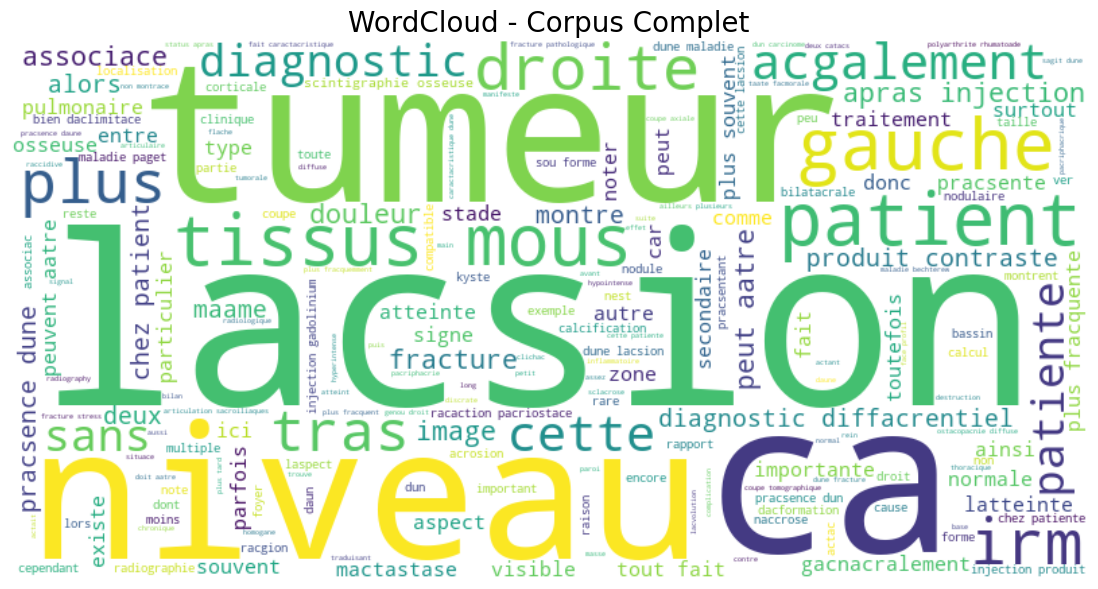

In [9]:
# ----------------------------
# WordCloud global
# ----------------------------
all_text = ' '.join(df['full_text'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_text)

plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud - Corpus Complet", fontsize=20)
plt.show()

In [5]:
# ----------------------------
# TF-IDF Vectorization
# ----------------------------
vectorizer = TfidfVectorizer(max_features=5000,  # tu peux ajuster selon la taille du dataset
                             ngram_range=(1,2),   # unigrams + bigrams
                             min_df=3,            # ignorer les mots trop rares
                             max_df=0.9)          # ignorer les mots trop fréquents
                             
X_tfidf = vectorizer.fit_transform(df['full_text'])

print(" TF-IDF créé")
print("Dimensions TF-IDF :", X_tfidf.shape)

# Les features nommées
tfidf_features = vectorizer.get_feature_names_out()
print("Exemples de features :", tfidf_features[:20])

 TF-IDF créé
Dimensions TF-IDF : (1236, 5000)
Exemples de features : ['aaa' 'aacrique' 'aacriques' 'aatre' 'aatre acvoquac' 'aatre difficile'
 'aatre due' 'aatre effectuace' 'aatre envisagace' 'aatre pracsents'
 'aatre responsable' 'aatre tras' 'aatre utile' 'aatres' 'abcas' 'abdomen'
 'abdomen sans' 'abdominal' 'abdominale' 'abdominales']


In [7]:
# ----------------------------
# Sauvegarder TF-IDF pour ML
# ----------------------------
import pickle

with open('tfidf_matrix.pkl', 'wb') as f:
    pickle.dump(X_tfidf, f)

with open('tfidf_features.pkl', 'wb') as f:
    pickle.dump(tfidf_features, f)

print(" TF-IDF et features sauvegardés pour ML")

 TF-IDF et features sauvegardés pour ML
